# Bank Loan Case Study

## Trainity Project 6

The main aim of this project is to identify patterns that indicate if a customer will have difficulty paying their installments. This information can be used to make decisions such as denying the loan, reducing the amount of loan, or lending at a higher interest rate to risky applicants. The company wants to understand the key factors behind loan default so it can make better decisions about loan approval.


In [ ]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# Import the dataset
data = pd.read_csv("drive/MyDrive/project6/application_data.csv",
                   low_memory=False)
#data

NameError: name 'pd' is not defined

In [ ]:
data.shape

(307511, 122)

As we can see, the data has 300,000+ records and 122 columns. However, we won't need all of the columns.

Moreover, there is some missing data. Let's look at how many missing values are there.

In [ ]:
data.dtypes

SK_ID_CURR                      float64
TARGET                          float64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                    float64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                      float64
DAYS_EMPLOYED                   float64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                 float64
OWN_CAR_AGE                     float64
FLAG_MOBIL                      float64
FLAG_EMP_PHONE                  float64
FLAG_WORK_PHONE                 float64


In [ ]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

## Dataset Cleaning

### Counting the missing values

In [ ]:
def check_missing(df):
  """
  Prints out the number of missing values in each column
  """
  for col in df.columns:
    print(f"{col}: {df[col].isna().sum()}")

check_missing(data)

SK_ID_CURR: 257512
TARGET: 257512
NAME_CONTRACT_TYPE: 257512
CODE_GENDER: 257512
FLAG_OWN_CAR: 257512
FLAG_OWN_REALTY: 257512
CNT_CHILDREN: 257512
AMT_INCOME_TOTAL: 257512
AMT_CREDIT: 257512
AMT_ANNUITY: 257513
AMT_GOODS_PRICE: 257550
NAME_TYPE_SUITE: 257704
NAME_INCOME_TYPE: 257512
NAME_EDUCATION_TYPE: 257512
NAME_FAMILY_STATUS: 257512
NAME_HOUSING_TYPE: 257512
REGION_POPULATION_RELATIVE: 257512
DAYS_BIRTH: 257512
DAYS_EMPLOYED: 257512
DAYS_REGISTRATION: 257512
DAYS_ID_PUBLISH: 257512
OWN_CAR_AGE: 33484
FLAG_MOBIL: 51021
FLAG_EMP_PHONE: 130676
FLAG_WORK_PHONE: 150744
FLAG_CONT_MOBILE: 125613
FLAG_PHONE: 171249
FLAG_EMAIL: 179905
OCCUPATION_TYPE: 152894
CNT_FAM_MEMBERS: 129634
REGION_RATING_CLIENT: 128145
REGION_RATING_CLIENT_W_CITY: 174748
WEEKDAY_APPR_PROCESS_START: 152869
HOUR_APPR_PROCESS_START: 175973
REG_REGION_NOT_LIVE_REGION: 129213
REG_REGION_NOT_WORK_REGION: 178800
LIVE_REGION_NOT_WORK_REGION: 142110
REG_CITY_NOT_LIVE_CITY: 130676
REG_CITY_NOT_WORK_CITY: 150744
LIVE_CITY_NOT_

In [ ]:
def plot_missing(df):
  """
  Plots a stacked bar graph to visualize
  the proportion of missing values for each variable
  """
  X = df.columns
  y1 = np.full(df.shape[1], df.shape[0])
  missing = [df[col].isna().sum() for col in X]
  y2 = np.array(missing)
  y3 = np.subtract(y1, y2)
  plt.figure(figsize=(30, 20))
  plt.bar(X, y3, color='b')
  plt.bar(X, y2, bottom=y3, color='r')
  plt.xlabel("Columns", fontsize=25)
  plt.ylabel("Number of rows", fontsize=25)
  plt.legend(["Value", "NaN"], prop = {'size' : 30})
  plt.tick_params(axis='x', labelrotation=90)
  plt.yticks(fontsize=20)
  plt.title("Proportion of Missing Values", fontdict = {'fontsize' : 50})
  plt.show()

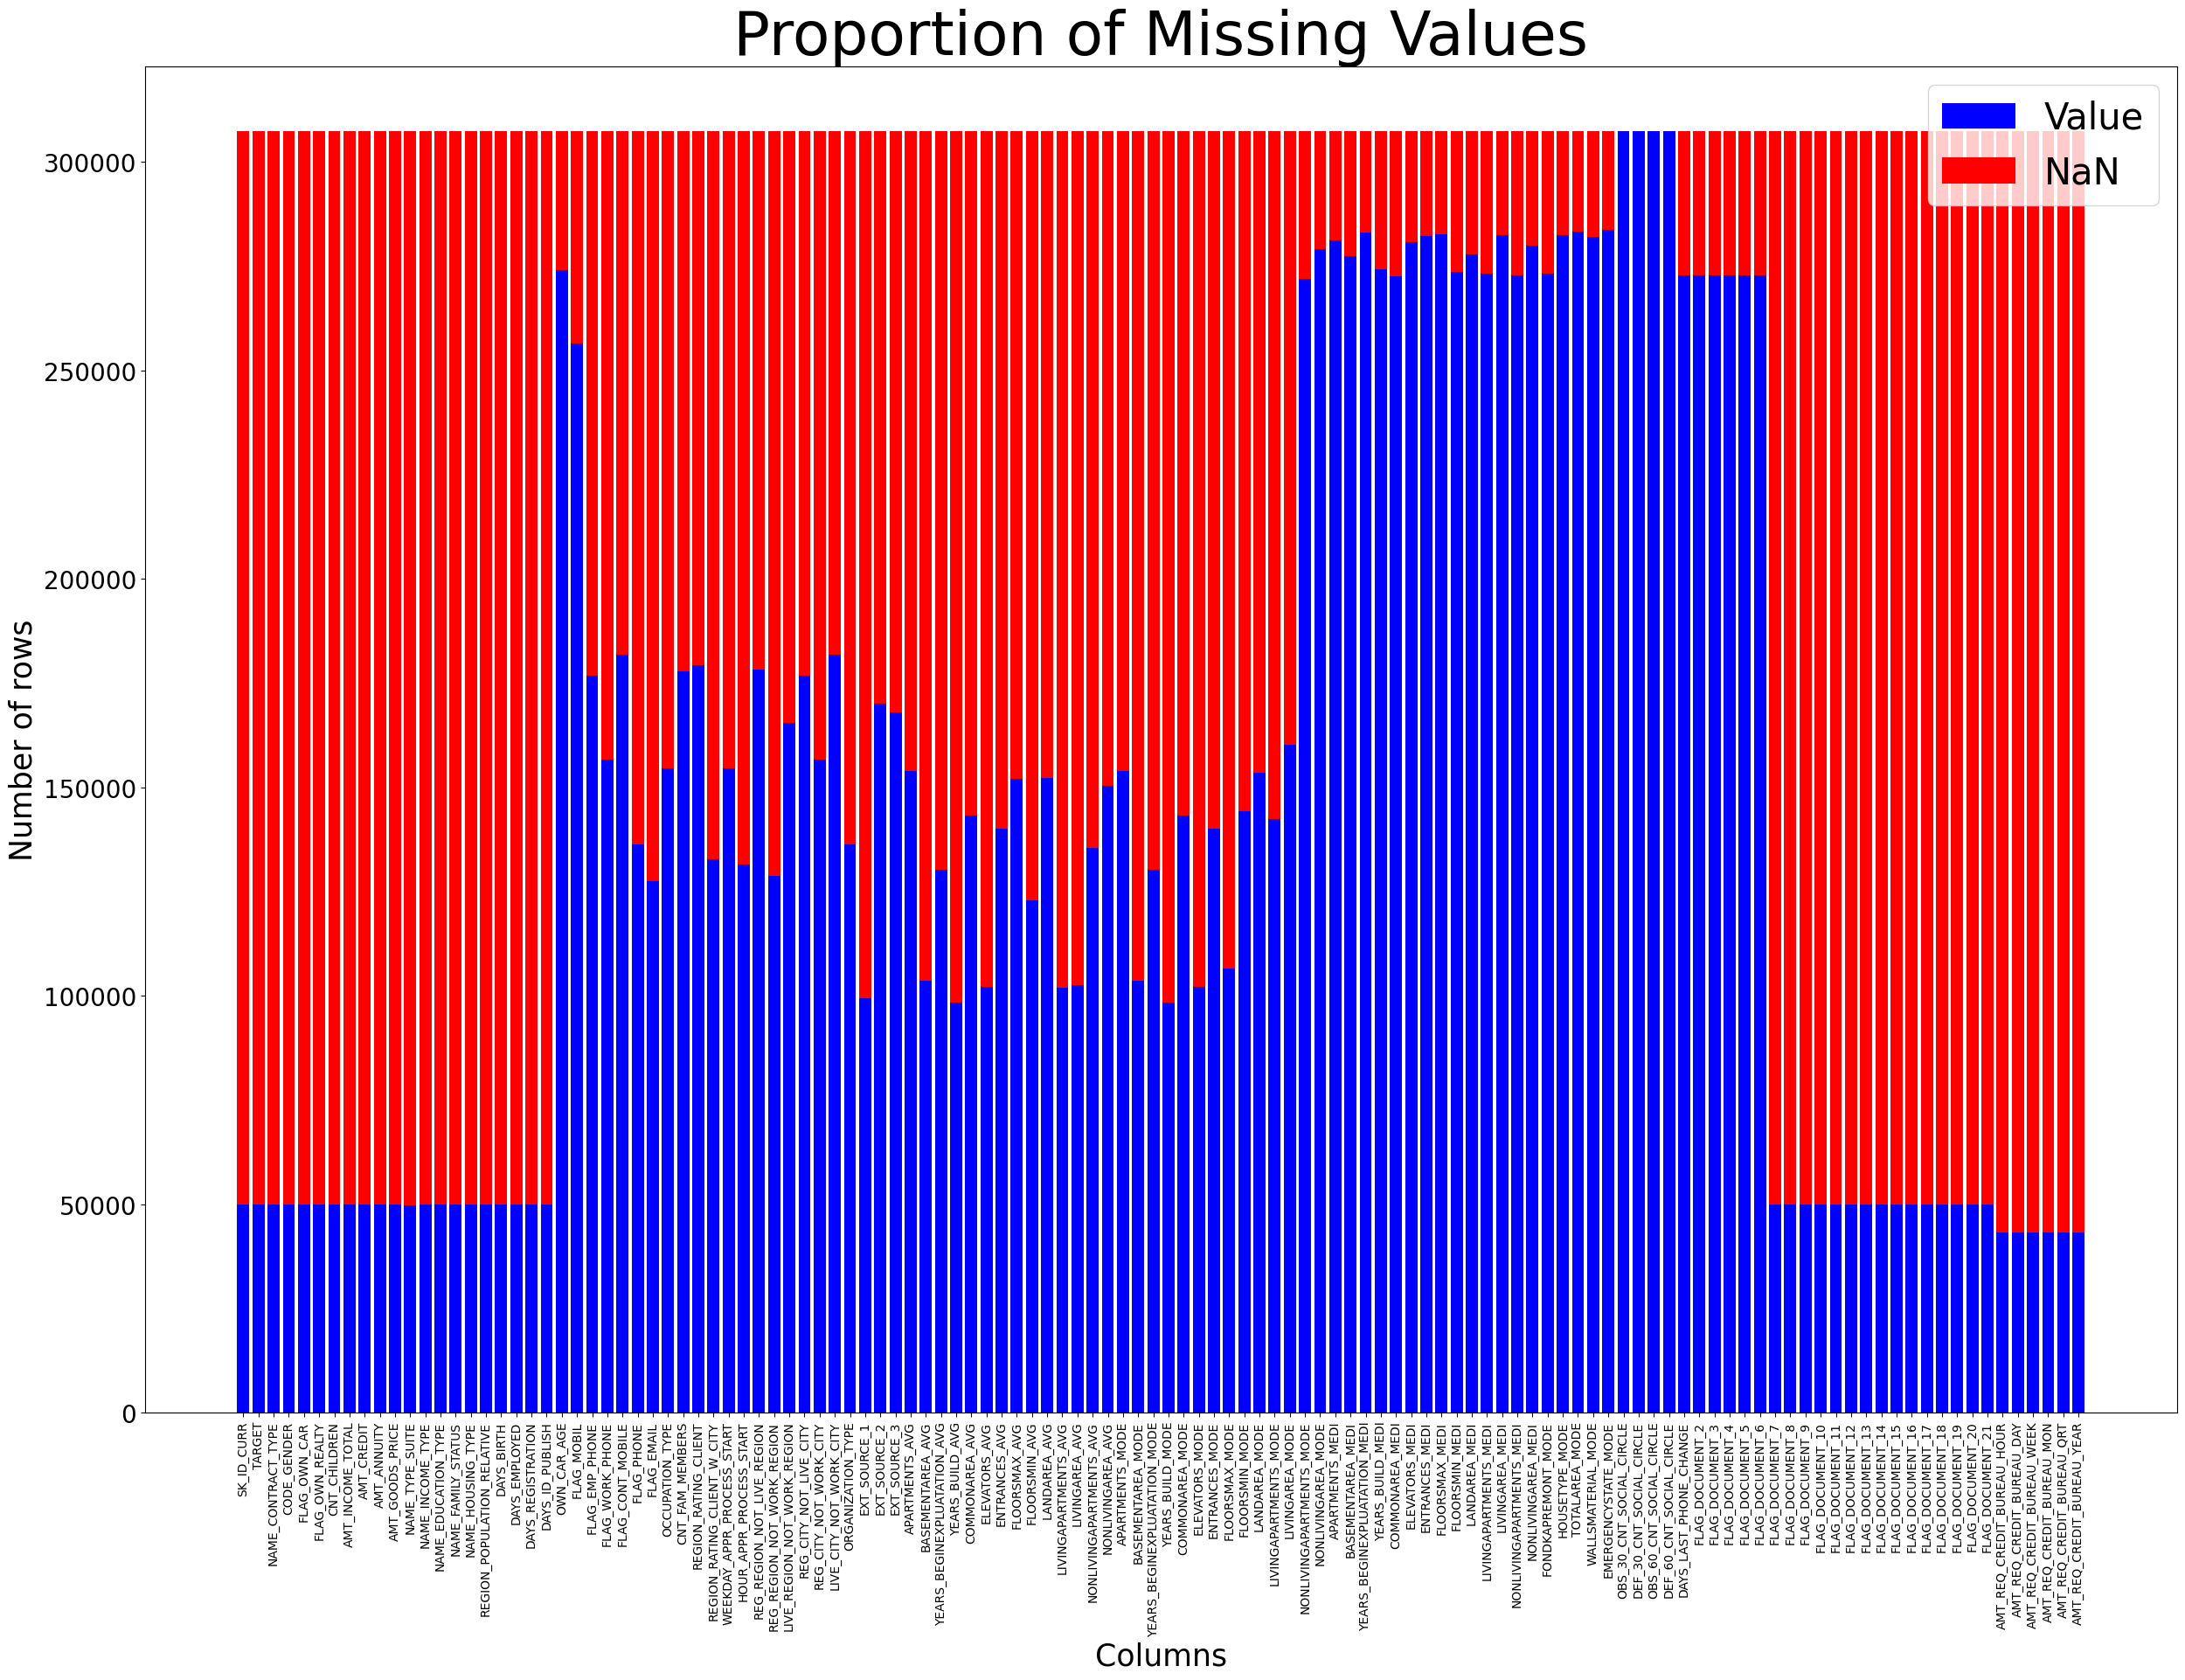

In [ ]:
plot_missing(data)

Observe that the `TARGET` column has a large number (257512) of missing values. Being a label, this column is dependent on all other variables, and hence randomly imputing it would lead to biases in our analysis.

Therefore, we choose to remove it. We can hope that some of the NaN values in the other columns also get eliminated when we do this.


Source:  
1. https://stackoverflow.com/questions/73644442/missing-value-in-target-variable#:~:text=Target%20variable%20is%20not%20advised,variable%20is%20to%20delete%20it.  
2. https://datascience.stackexchange.com/questions/26581/should-i-impute-target-values

In [ ]:
# Dropping rows with a NaN value in TARGET column
data = data.dropna(subset="TARGET")

Now let's look at the number of missing values in the new dataset.

In [ ]:
check_missing(data)

SK_ID_CURR: 0
TARGET: 0
NAME_CONTRACT_TYPE: 0
CODE_GENDER: 0
FLAG_OWN_CAR: 0
FLAG_OWN_REALTY: 0
CNT_CHILDREN: 0
AMT_INCOME_TOTAL: 0
AMT_CREDIT: 0
AMT_ANNUITY: 1
AMT_GOODS_PRICE: 38
NAME_TYPE_SUITE: 192
NAME_INCOME_TYPE: 0
NAME_EDUCATION_TYPE: 0
NAME_FAMILY_STATUS: 0
NAME_HOUSING_TYPE: 0
REGION_POPULATION_RELATIVE: 0
DAYS_BIRTH: 0
DAYS_EMPLOYED: 0
DAYS_REGISTRATION: 0
DAYS_ID_PUBLISH: 0
OWN_CAR_AGE: 32950
FLAG_MOBIL: 0
FLAG_EMP_PHONE: 0
FLAG_WORK_PHONE: 0
FLAG_CONT_MOBILE: 0
FLAG_PHONE: 0
FLAG_EMAIL: 0
OCCUPATION_TYPE: 15654
CNT_FAM_MEMBERS: 1
REGION_RATING_CLIENT: 0
REGION_RATING_CLIENT_W_CITY: 0
WEEKDAY_APPR_PROCESS_START: 0
HOUR_APPR_PROCESS_START: 0
REG_REGION_NOT_LIVE_REGION: 0
REG_REGION_NOT_WORK_REGION: 0
LIVE_REGION_NOT_WORK_REGION: 0
REG_CITY_NOT_LIVE_CITY: 0
REG_CITY_NOT_WORK_CITY: 0
LIVE_CITY_NOT_WORK_CITY: 0
ORGANIZATION_TYPE: 0
EXT_SOURCE_1: 28172
EXT_SOURCE_2: 126
EXT_SOURCE_3: 9944
APARTMENTS_AVG: 25385
BASEMENTAREA_AVG: 29199
YEARS_BEGINEXPLUATATION_AVG: 24394
YEARS_BUIL

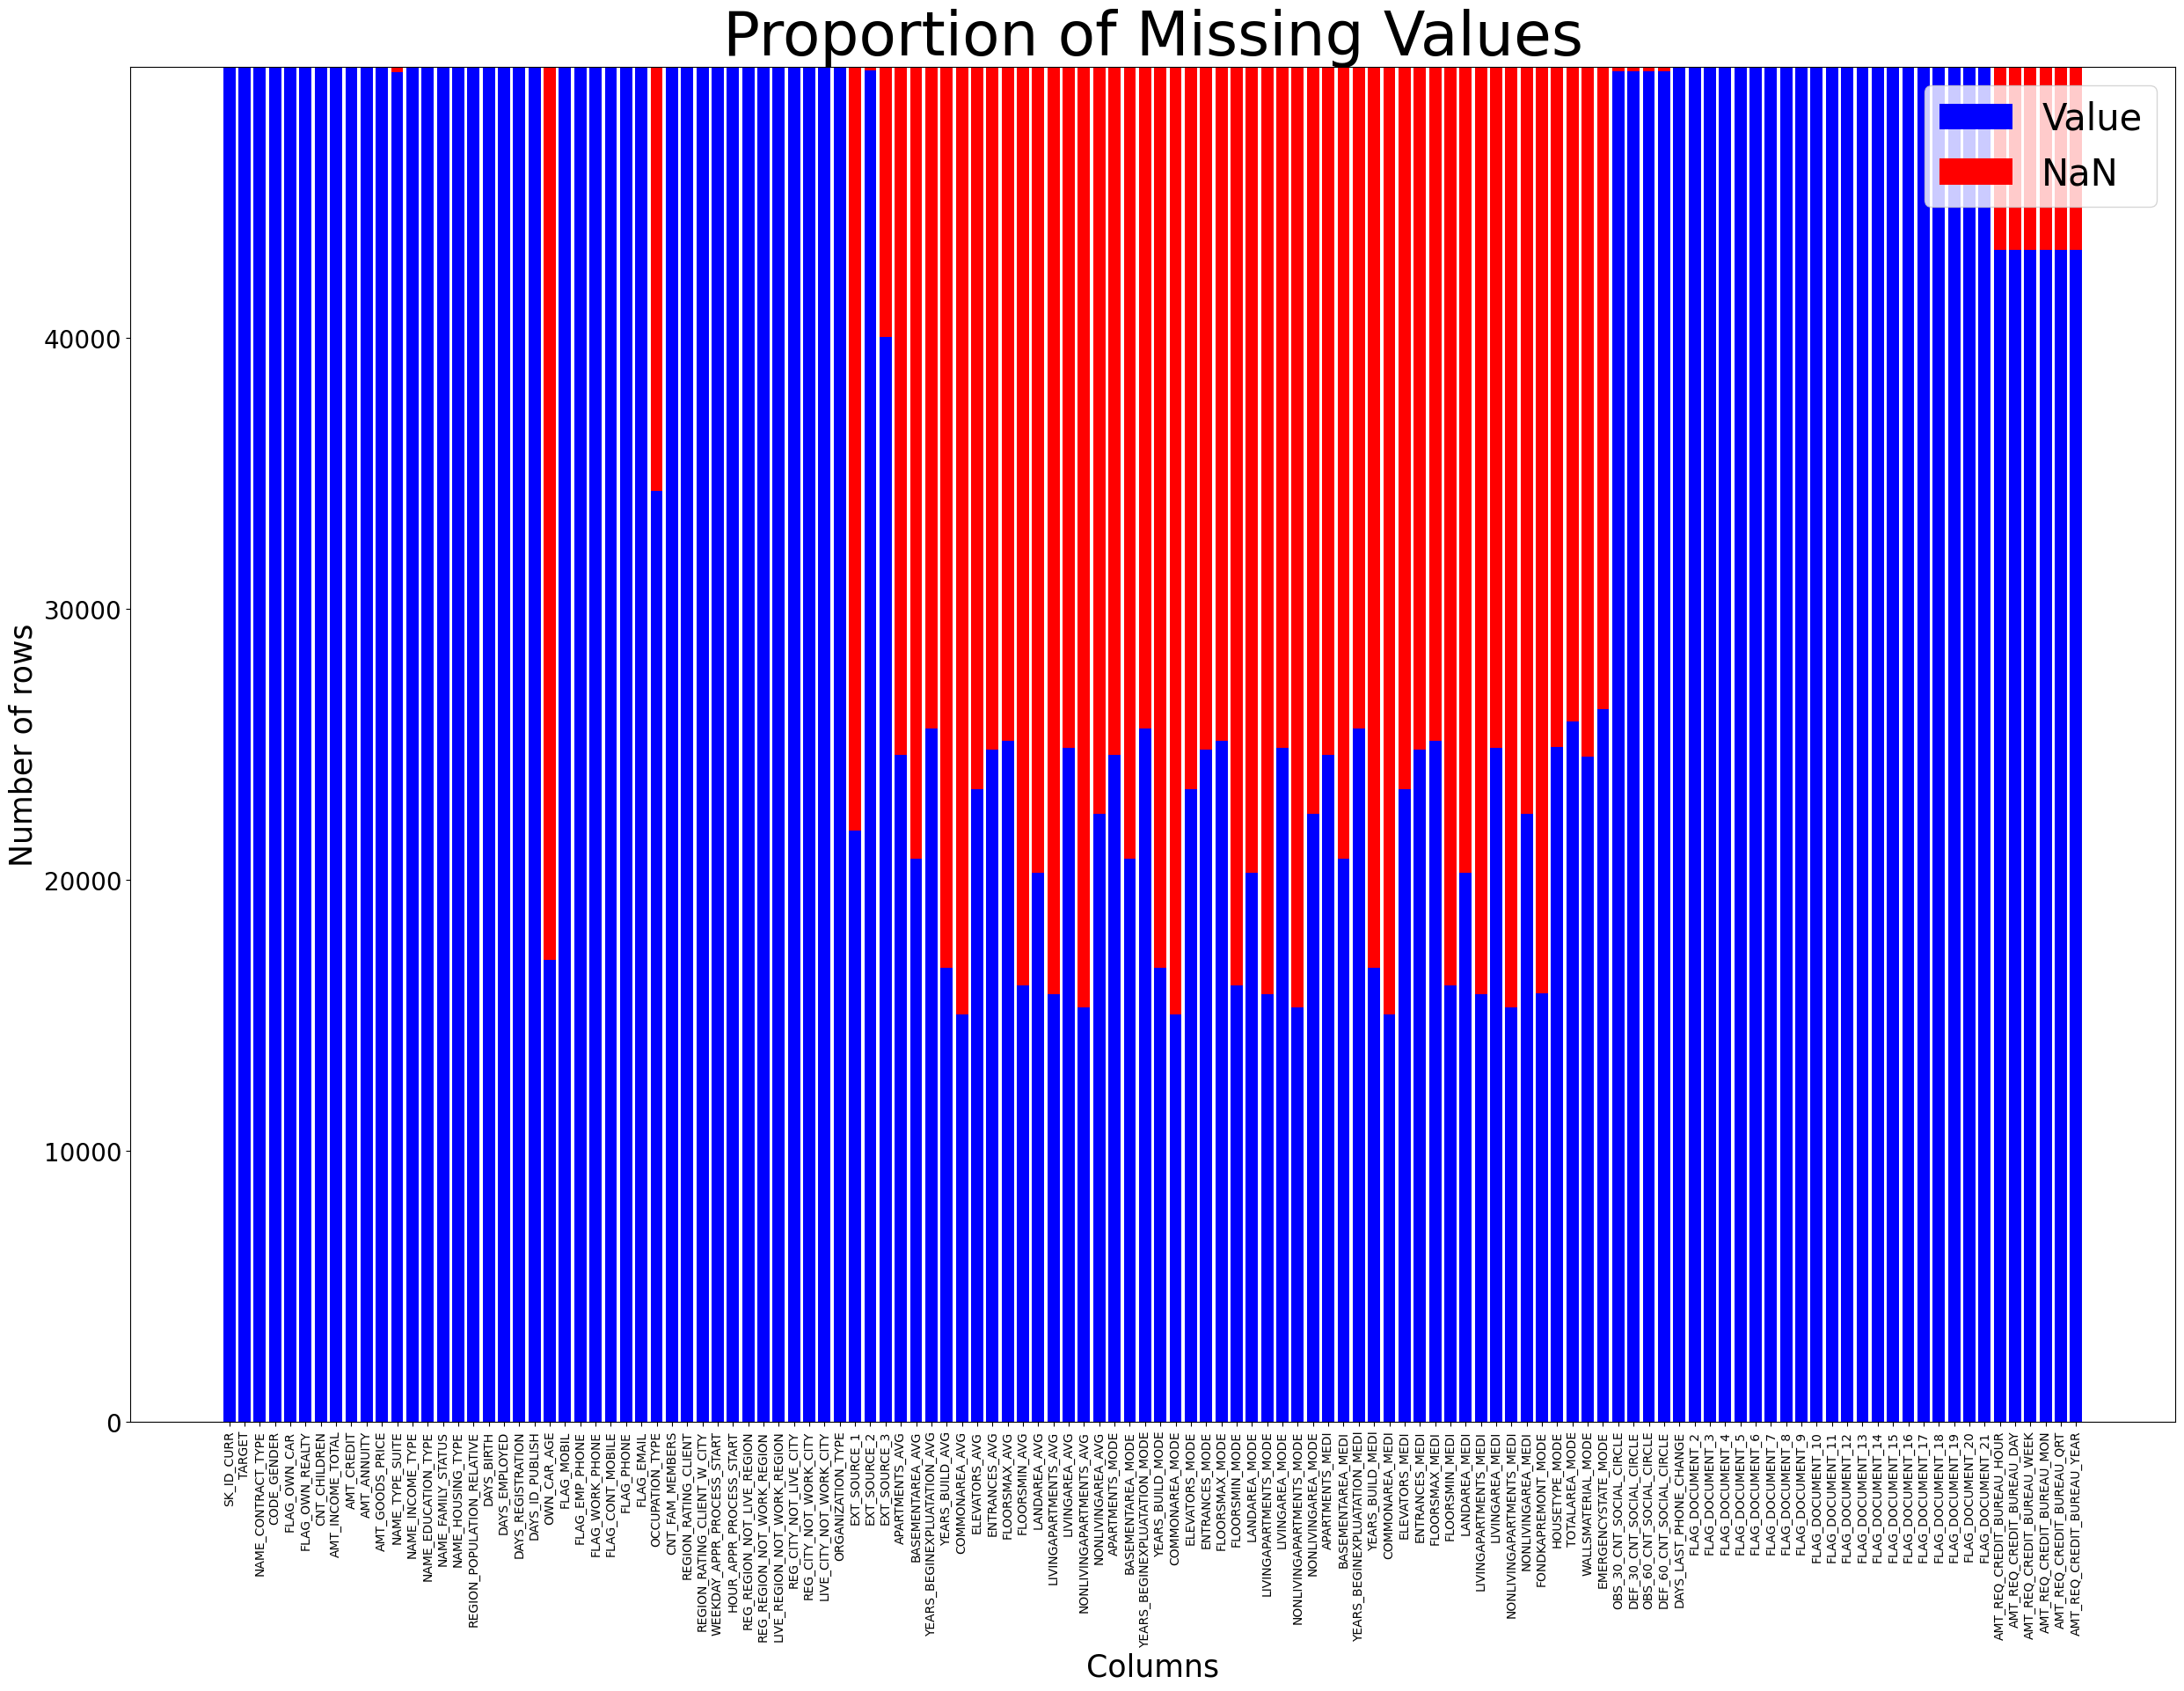

In [ ]:
plot_missing(data)

However, there is still a huge amount of missing data. But we are going to drop some columns which aren't required for our analysis, which may bring down the NaN's.

For missing values in the independent variables (or features), we'll have to use standard imputation techniques such as **average** or **median**.

### Dropping columns

In [ ]:
data.columns.to_list()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [ ]:
drop_columns = [
    'SK_ID_CURR',
'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
  'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
  'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
  'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
'OWN_CAR_AGE',
'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
  'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
  'FLAG_MOBIL',
'REGION_POPULATION_RELATIVE',
 'AMT_GOODS_PRICE',
'DAYS_LAST_PHONE_CHANGE',
'EXT_SOURCE_2',
'DAYS_REGISTRATION',
'DAYS_ID_PUBLISH',
'FLAG_CONT_MOBILE',
'REGION_RATING_CLIENT_W_CITY',
'OBS_30_CNT_SOCIAL_CIRCLE',
'OBS_60_CNT_SOCIAL_CIRCLE',
'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
  'NAME_TYPE_SUITE']
data.drop(drop_columns, axis=1, inplace=True)

<ipython-input-31-c8974dd10c80>:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(drop_columns, axis=1, inplace=True)


In [ ]:
data.shape

(49999, 21)

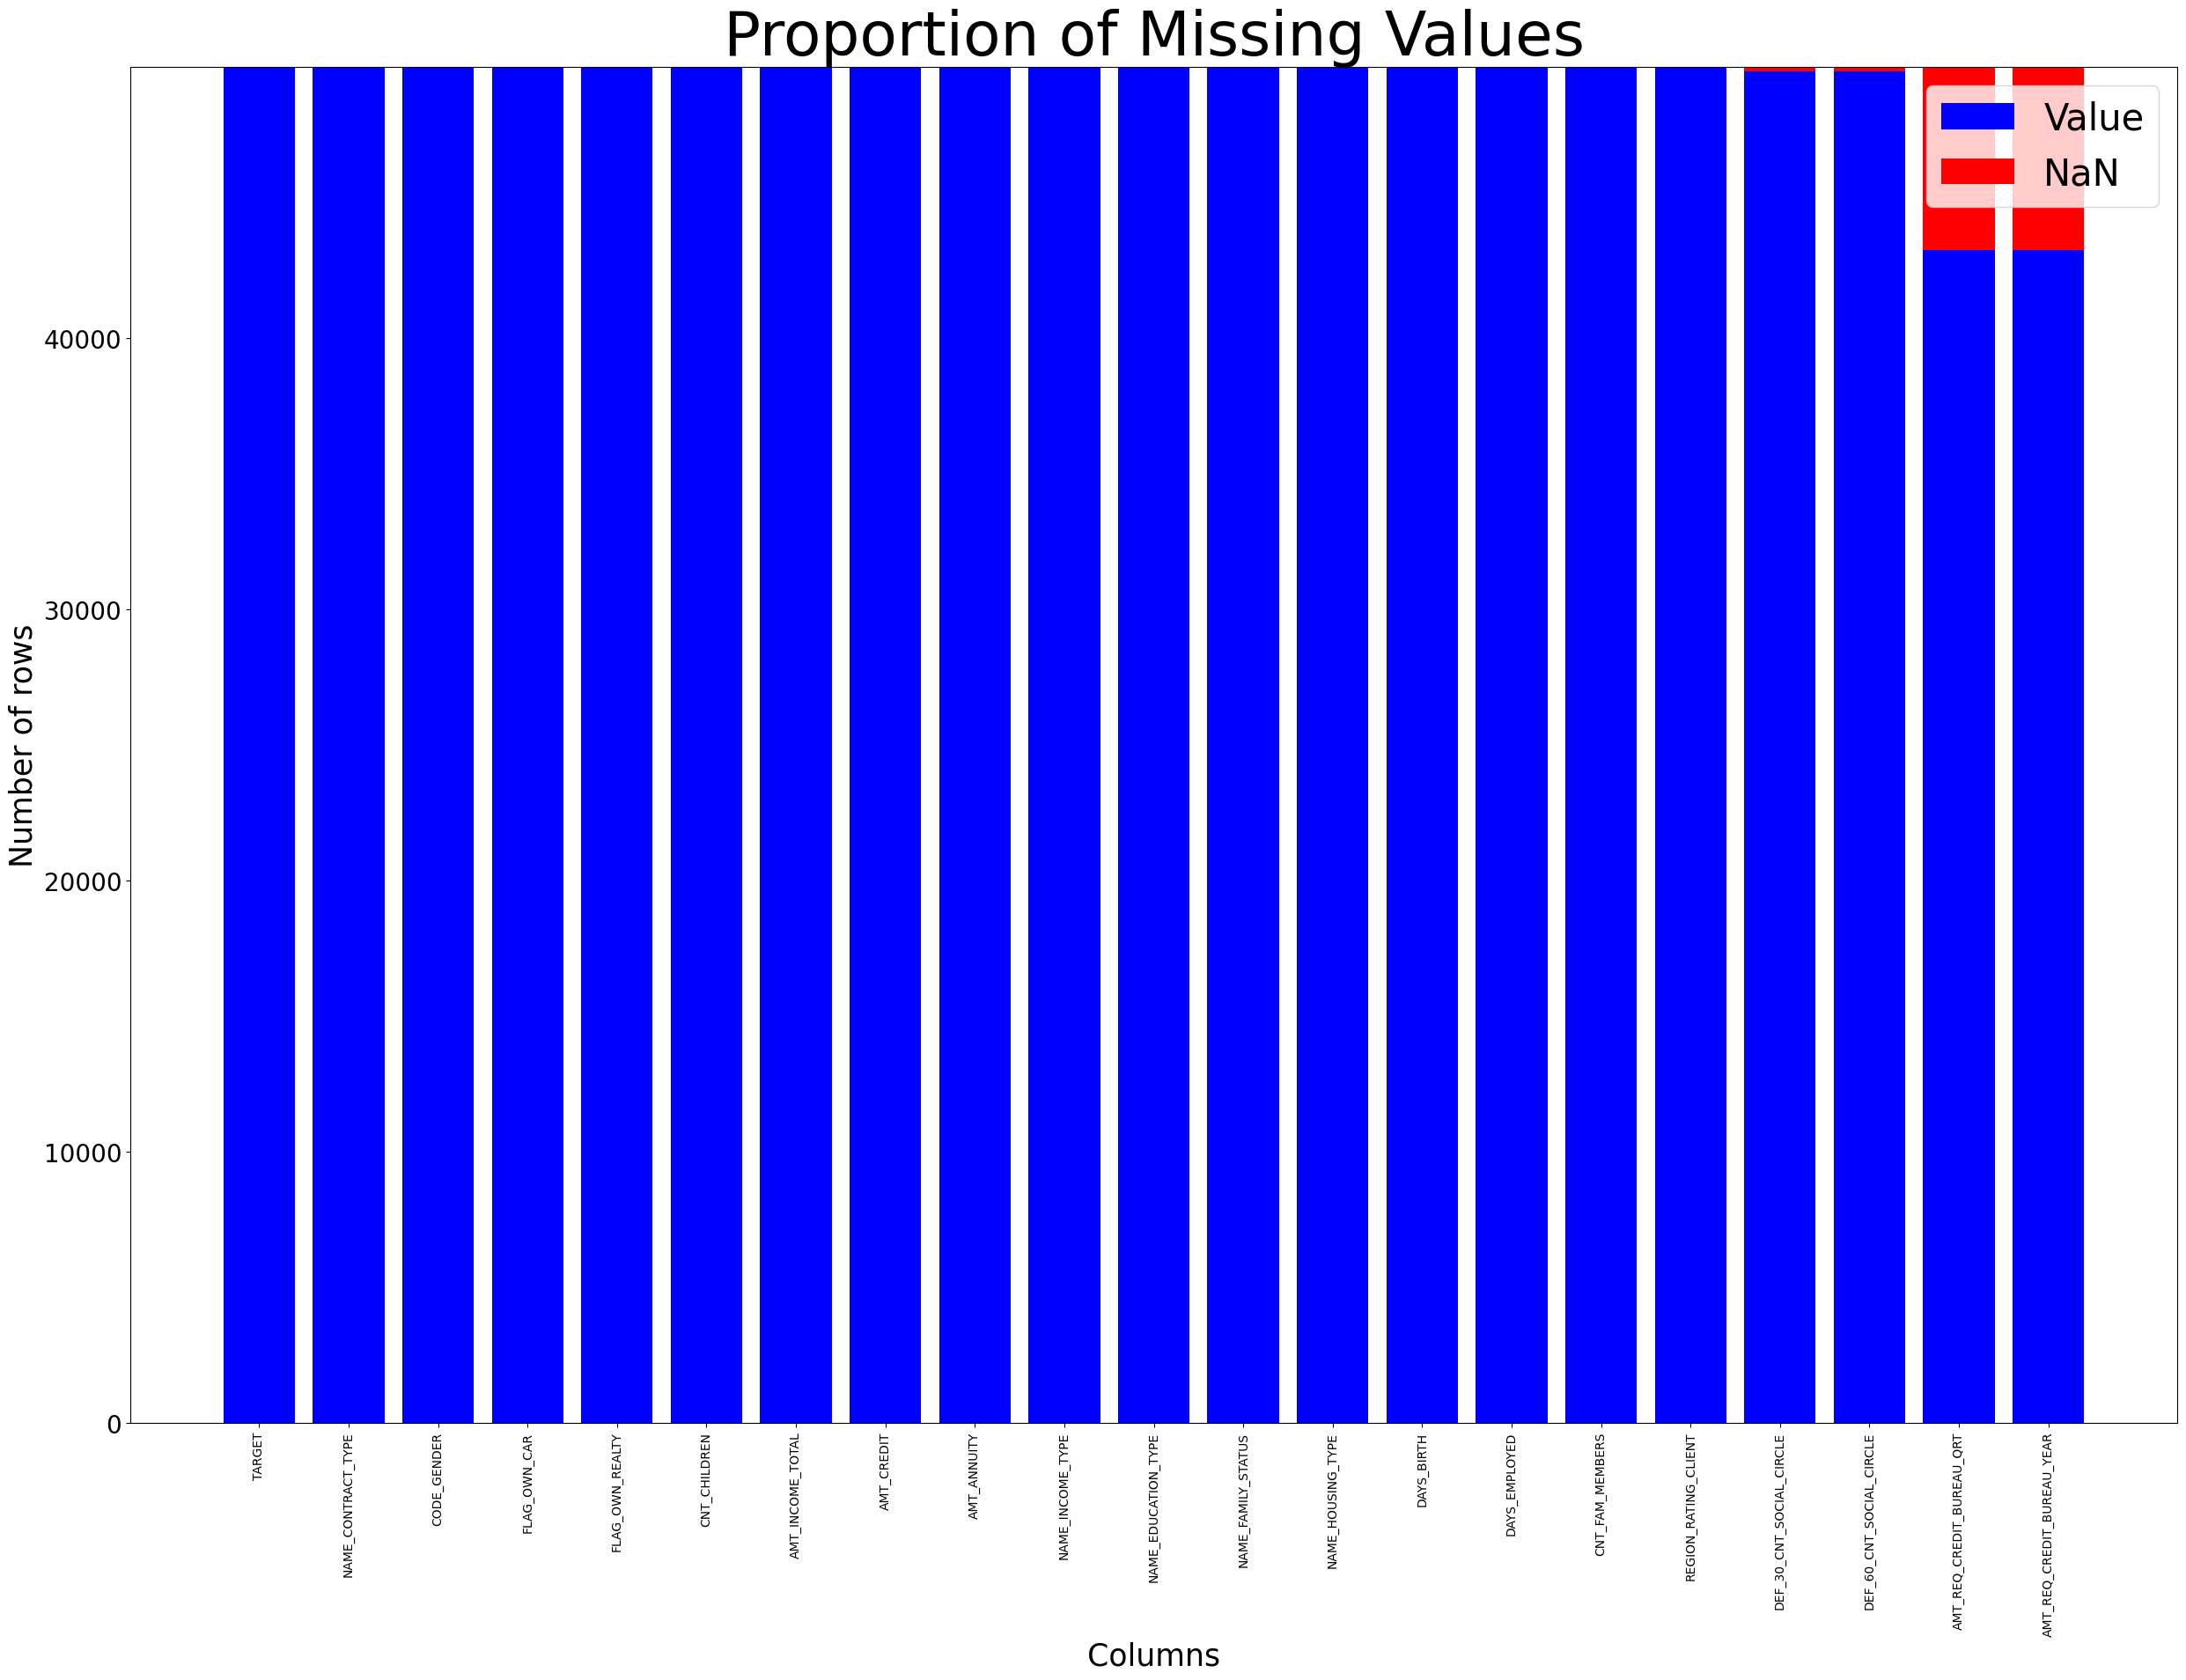

In [ ]:
plot_missing(data)

In [ ]:
# Let's save this dataset so that we won't have to run the previous cells
#   every time we open the workbook
data.to_csv("drive/MyDrive/project6/new-data.csv", index=False)

In [ ]:
data = pd.read_csv("drive/MyDrive/project6/new-data.csv")

### Impute numerical and categorical columns

Observe that all categorical (string) columns have been completely filled, and hence we'll be imputing only the numerical fields.

In [ ]:
# Check for the all numerical columns
for label, content in data.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label, ":", content.isna().sum())

TARGET : 0
CNT_CHILDREN : 0
AMT_INCOME_TOTAL : 0
AMT_CREDIT : 0
AMT_ANNUITY : 1
DAYS_BIRTH : 0
DAYS_EMPLOYED : 0
CNT_FAM_MEMBERS : 1
REGION_RATING_CLIENT : 0
DEF_30_CNT_SOCIAL_CIRCLE : 168
DEF_60_CNT_SOCIAL_CIRCLE : 168
AMT_REQ_CREDIT_BUREAU_QRT : 6734
AMT_REQ_CREDIT_BUREAU_YEAR : 6734


In [ ]:
# Check for the all numerical columns with missing values
for label, content in data.items():
    if pd.api.types.is_numeric_dtype(content) and content.isna().sum():
        print(label, ":", content.isna().sum())

AMT_ANNUITY : 1
CNT_FAM_MEMBERS : 1
DEF_30_CNT_SOCIAL_CIRCLE : 168
DEF_60_CNT_SOCIAL_CIRCLE : 168
AMT_REQ_CREDIT_BUREAU_QRT : 6734
AMT_REQ_CREDIT_BUREAU_YEAR : 6734


In [ ]:
# We use the median instead of mean since the former is more robust to outliers (extreme values)
for label, content in data.items():
    if pd.api.types.is_numeric_dtype(content) and content.isna().sum():
        data[label] = content.fillna(content.median())

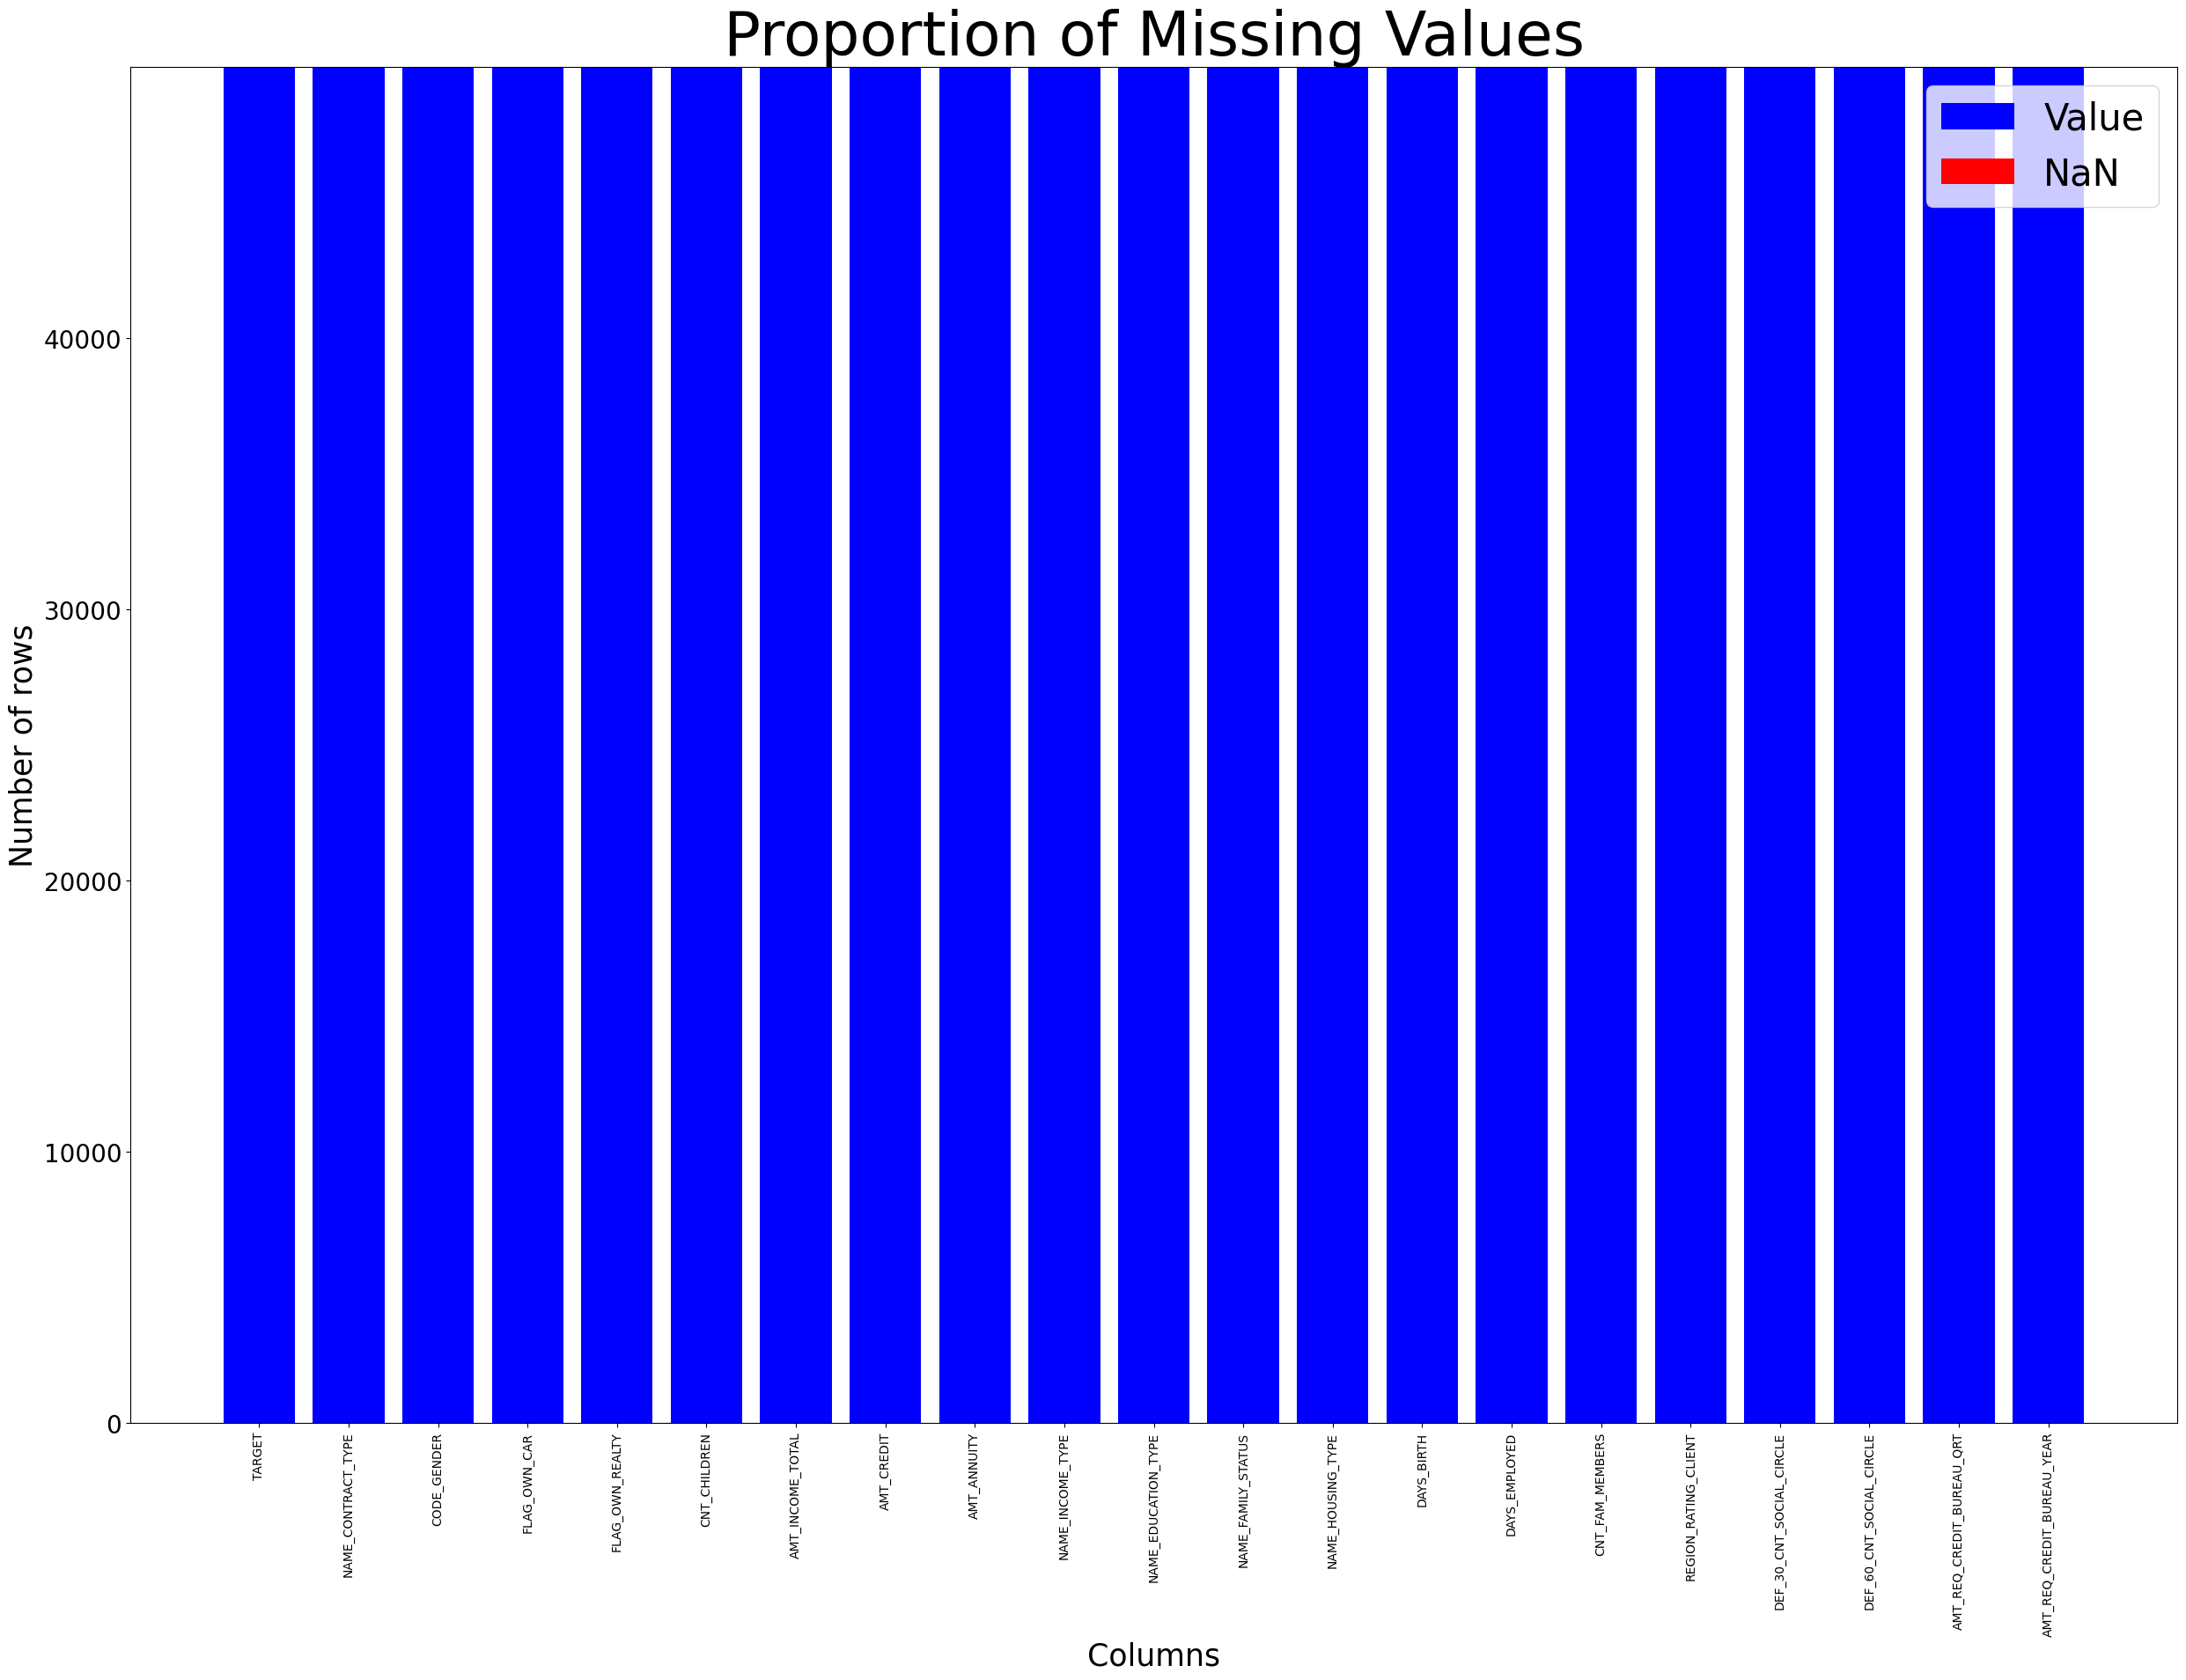

In [ ]:
# Finally, let's check once again if there is anything missing
plot_missing(data)

## Finding outliers

In [ ]:
# The describe() function gives us the mean, max, min and the quartile
#     values of each column
data.describe()

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  49999.000000  49999.000000      4.999900e+04  4.999900e+04   
mean       0.080522      0.419848      1.707676e+05  5.997006e+05   
std        0.272102      0.724039      5.318191e+05  4.024154e+05   
min        0.000000      0.000000      2.565000e+04  4.500000e+04   
25%        0.000000      0.000000      1.125000e+05  2.700000e+05   
50%        0.000000      0.000000      1.458000e+05  5.147775e+05   
75%        0.000000      1.000000      2.025000e+05  8.086500e+05   
max        1.000000     11.000000      1.170000e+08  4.050000e+06   

         AMT_ANNUITY    DAYS_BIRTH  DAYS_EMPLOYED  CNT_FAM_MEMBERS  \
count   49999.000000  49999.000000   49999.000000     49999.000000   
mean    27107.333987 -16022.042081   63219.424488         2.158943   
std     14562.802028   4361.400270  140794.605668         0.911324   
min      2052.000000 -25184.000000  -17531.000000         1.000000   
25%     16456.500000 -19644.000000   -2786.000000         2.000000   
50%     24939.000000 -15731.000000   -1221.000000         2.000000   
75%     34596.000000 -12378.500000    -292.000000         3.000000   
max    258025.500000  -7680.000000  365243.000000        13.000000   

       REGION_RATING_CLIENT  DEF_30_CNT_SOCIAL_CIRCLE  \
count          49999.000000              49999.000000   
mean               2.051661                  0.141343   
std                0.507978                  0.439875   
min                1.000000                  0.000000   
25%                2.000000                  0.000000   
50%                2.000000                  0.000000   
75%                2.000000                  0.000000   
max                3.000000                  6.000000   

       DEF_60_CNT_SOCIAL_CIRCLE  AMT_REQ_CREDIT_BUREAU_QRT  \
count              49999.000000               49999.000000   
mean                   0.098002                   0.225825   
std                    0.356708                   0.571627   
min                    0.000000                   0.000000   
25%                    0.000000                   0.000000   
50%                    0.000000                   0.000000   
75%                    0.000000                   0.000000   
max                    5.000000                   8.000000   

       AMT_REQ_CREDIT_BUREAU_YEAR  
count                49999.000000  
mean                     1.762375  
std                      1.760795  
min                      0.000000  
25%                      1.000000  
50%                      1.000000  
75%                      3.000000  
max                     25.000000

Observe that the `CNT_CHILDREN`, `AMT_INCOME_TOTAL` have potential outliers.

> For example, the max value in `CNT_CHILDREN` is 11 but the mean is as small as 0.42. This tells us that the max value doesn't have any effect on the mean and hence, it can be considered an outlier.

> Similarly with `AMT_INCOME_TOTAL`, the maximum value is \$117,000,000 while the mean is \$170,767.6.



In [ ]:
data.head(100)

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      1.0         Cash loans           M            N               Y   
1      0.0         Cash loans           F            N               N   
2      0.0    Revolving loans           M            Y               Y   
3      0.0         Cash loans           F            N               Y   
4      0.0         Cash loans           M            N               Y   
5      0.0         Cash loans           M            N               Y   
6      0.0         Cash loans           F            Y               Y   
7      0.0         Cash loans           M            Y               Y   
8      0.0         Cash loans           F            N               Y   
9      0.0    Revolving loans           M            N               Y   
10     0.0         Cash loans           F            N               Y   
11     0.0         Cash loans           F            N               Y   
12     0.0         Cash loans           F            N               Y   
13     0.0         Cash loans           M            Y               N   
14     0.0         Cash loans           F            N               Y   
15     0.0         Cash loans           M            Y               Y   
16     0.0         Cash loans           M            N               N   
17     0.0    Revolving loans           F            N               Y   
18     0.0    Revolving loans           F            N               Y   
19     0.0         Cash loans           F            N               Y   
20     0.0    Revolving loans           M            Y               Y   
21     0.0         Cash loans           F            Y               Y   
22     0.0         Cash loans           F            N               N   
23     0.0         Cash loans           F            N               Y   
24     0.0         Cash loans           M            Y               N   
25     0.0         Cash loans           F            N               Y   
26     1.0         Cash loans           F            N               Y   
27     0.0         Cash loans           M            N               Y   
28     0.0         Cash loans           M            Y               Y   
29     0.0    Revolving loans           M            N               Y   
30     0.0         Cash loans           F            N               Y   
31     0.0         Cash loans           F            N               Y   
32     0.0         Cash loans           F            N               N   
33     0.0         Cash loans           M            Y               N   
34     0.0         Cash loans           F            N               Y   
35     0.0         Cash loans           F            N               N   
36     0.0         Cash loans           F            N               Y   
37     0.0         Cash loans           M            N               Y   
38     0.0         Cash loans           F            N               Y   
39     0.0    Revolving loans           M            Y               Y   
40     1.0         Cash loans           M            N               Y   
41     0.0         Cash loans           F            N               Y   
42     1.0         Cash loans           F            N               N   
43     0.0         Cash loans           F            N               Y   
44     0.0         Cash loans           M            N               Y   
45     0.0    Revolving loans           F            N               Y   
46     0.0         Cash loans           F            N               Y   
47     0.0         Cash loans           F            N               Y   
48     0.0         Cash loans           F            N               N   
49     0.0         Cash loans           M            Y               Y   
50     0.0    Revolving loans           F            N               Y   
51     0.0         Cash loans           M            Y               Y   
52     0.0         Cash loans           M            Y               N   
53     0

Let's also create a scatter plot to see the outliers and mark them.

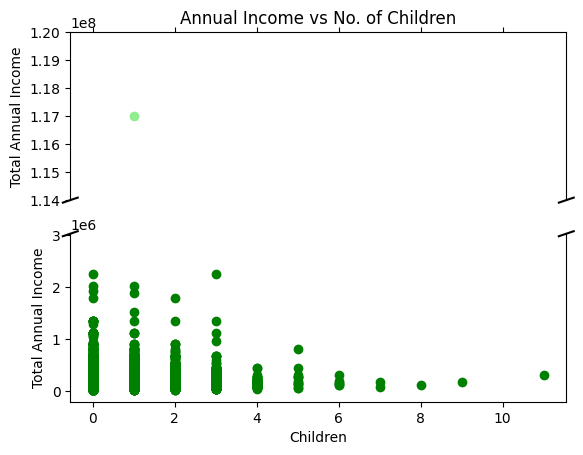

In [ ]:
# Scatter plot between the potential outlier fields
# Bivariate analysis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.scatter("CNT_CHILDREN", "AMT_INCOME_TOTAL", data = data, color='lightgreen')
ax2.scatter("CNT_CHILDREN", "AMT_INCOME_TOTAL", data=data, color='green')
ax1.set_title("Annual Income vs No. of Children")
ax2.set_xlabel("Children")
ax1.set_ylabel("Total Annual Income")
ax2.set_ylabel("Total Annual Income")

ax1.set_ylim(114000000, 120000000)
ax2.set_ylim(-200000, 3025000.0)
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()
d = .015
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)
plt.show()

> Notice there is one **major** outlier with an income of \$117M, while all other observations are in the \$0-3M range.

> There is one data point with 11 children but a comparatively lower income. This could be considered a **minor** outlier, since it won't make much of a difference in our analysis.

The code above has been referenced from:
https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/broken_axis.html


## Checking for Data Imbalance

Since we are interested in knowing if an applicant's loan has been defaulted (late payment), we'll use the `TARGET` column as the basis for checking an imbalance.

Let's plot a pie chart for the `TARGET` column.

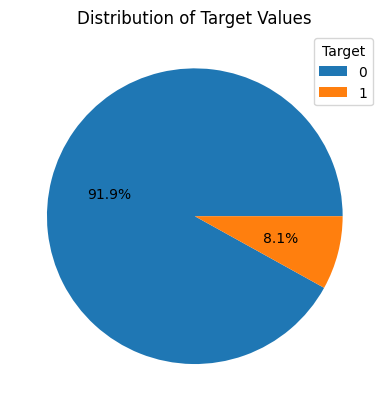

In [ ]:
labels = ['0', '1']
fig, ax = plt.subplots()
ax.pie(data["TARGET"].value_counts(),
       autopct='%1.1f%%')
ax.set(title="Distribution of Target Values")
ax.legend(labels=labels,
          title="Target");

As observed, there is a huge imbalance in the number of applicants who didn't have loan defaults (91.9%) and who did have loan defaults (8.1%).

The loans that got defaulted are around 1/10th in number compared to the ones that didn't.


Data imbalance can affect the accuracy of the analysis and lead to biases, especially for binary classification problems.

## Univariate, Segmented Univariate and Bivariate Analysis


In [ ]:
# Show columns
data.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')


Let's first look at the distribution of gender among the applicants.

In [ ]:
data["CODE_GENDER"].value_counts()

F      32823
M      17174
XNA        2
Name: CODE_GENDER, dtype: int64

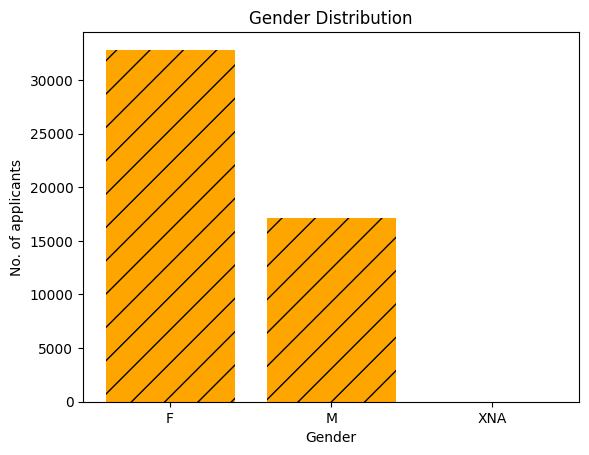

In [ ]:
# Univariate
glabels = ['F', 'M', 'XNA']
fig, ax = plt.subplots()
ax.bar(x=glabels,
       height=data["CODE_GENDER"].value_counts(),
       color='orange',
       hatch='/')
ax.set(title="Gender Distribution",
       xlabel="Gender",
       ylabel="No. of applicants");

Observe that the female applicants are **double in number** to their male counterparts. XNA is almost negligible.

This is another example of data imbalance where all elements of the domain are not equally represented.  


We are interested in loan defaults but this bar chart isn't truly reflective of what we want. Therefore, let's plot a bar chart taking **`TARGET`** into consideration.

In [ ]:
# Compare gender with target columns
pd.crosstab(data["TARGET"], data["CODE_GENDER"])

CODE_GENDER      F      M  XNA
TARGET                        
0.0          30559  15412    2
1.0           2264   1762    0

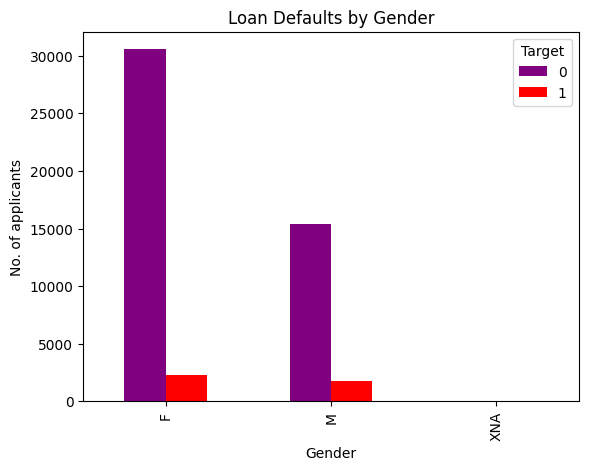

In [ ]:
# Plot it
# Bivariate
pd.crosstab(data["CODE_GENDER"], data["TARGET"]).plot(kind="bar",
                                                      color=["purple", "red"],
                                                      ylabel="No. of applicants",
                                                      xlabel="Gender",
                                                      title="Loan Defaults by Gender")
plt.legend(['0', '1'], title="Target");

As you can see, roughly **10%** of male applicants ended up defaulting their loans. This amount was lesser for female applicants (**7%**).

This means it's important to look at male applications with even more scrutiny, before approving them.

Overall, the proportion is almost the same; hence we can conclude that gender **doesn't have** that much of a role to play when it comes to delayed loan payments.



---



---



Education is an important aspect in one's life. Let's look at how education plays a role, if any, in an applicant's loan being defaulted.

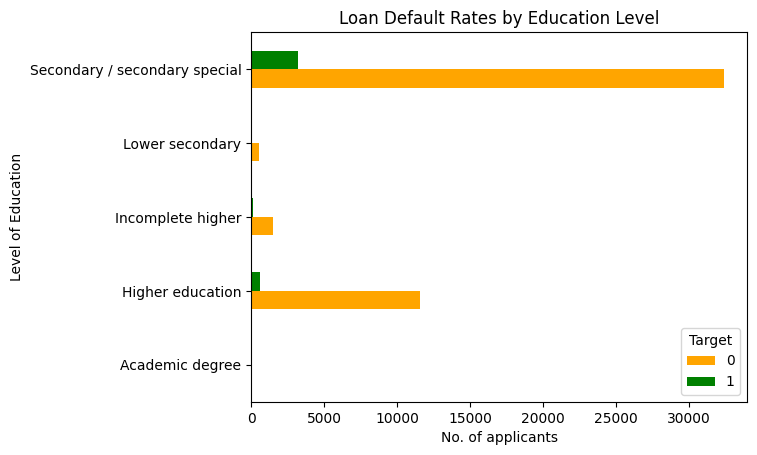

In [ ]:
# Segmented univariate
pd.crosstab(data["NAME_EDUCATION_TYPE"],
            data["TARGET"]).plot(kind="barh",
                                color=["orange", "green"],
                                xlabel="No. of applicants",
                                ylabel="Level of Education",
                                title="Loan Default Rates by Education Level")
plt.legend(['0', '1'], title="Target", loc = 'lower right');

In [ ]:
pd.crosstab(data["NAME_EDUCATION_TYPE"],
            data["TARGET"])

TARGET                           0.0   1.0
NAME_EDUCATION_TYPE                       
Academic degree                   20     0
Higher education               11561   606
Incomplete higher               1482   138
Lower secondary                  547    73
Secondary / secondary special  32363  3209

Insights:

- Academic degree has almost negligible records.
- Lower Secondary and Incomplete higher education levels have comparatively lesser representation.
- Percentage of loan defaults for each category:
  1. Academic degree: 0%
  2. Higher education: ~5%
  3. Incomplete higher: 8.5%
  4. Secondary / secondary special: 9%
  5. Lower secondary: 11.7%

- This makes it very clear that as people get more educated, the chances of having difficulties in payment reduces. This could be probably due to higher income streams and more awareness. Hence, higher education and on-time payment go hand-in-hand.



---
---

Talking of income, we'll look at how education levels and income streams are related. We expect it to be directly proportional.



Let's make a pivot table to get the average incomes for each type of education level.

In [ ]:
# Segmented univariate
pivot = data.pivot_table(index="NAME_EDUCATION_TYPE",
                         values="AMT_INCOME_TOTAL",
                         aggfunc = "mean")

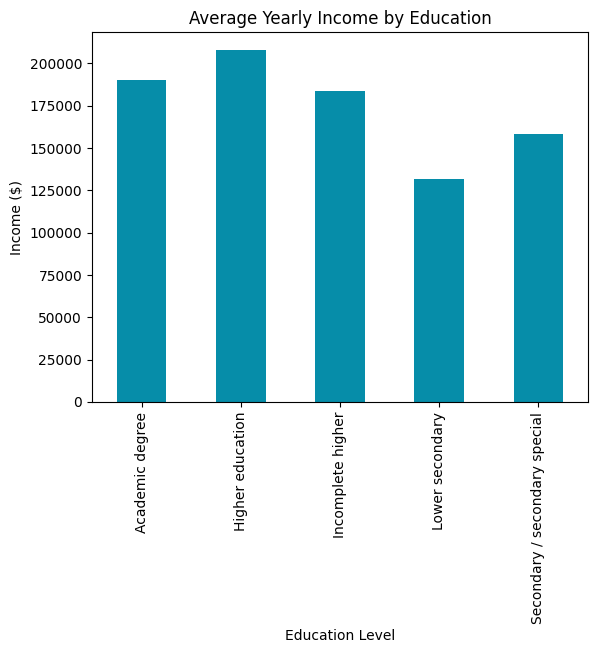

In [ ]:
pivot.plot(kind="bar",
           xlabel="Education Level",
           ylabel="Income ($)",
           title="Average Yearly Income by Education",
           color = '#068da9',
           legend=False);

As per our assumptions, **more the education** an applicant receives, better would be their chances of drawing a **higher mean yearly salary**.

Now, it's time to look at the number of family members and children for each applicant how that affects a loan applicant in repayment of their loan.

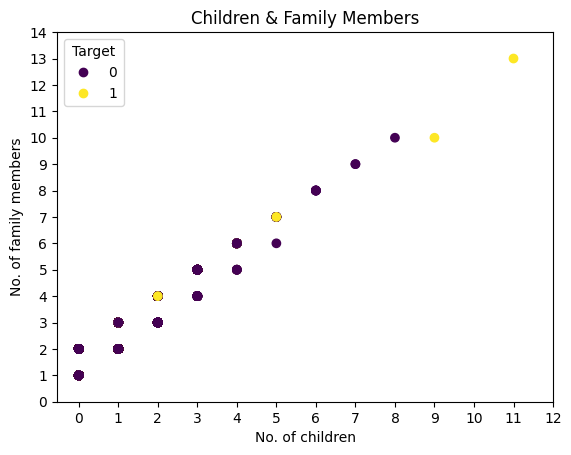

In [ ]:
fig, ax = plt.subplots()
sc = ax.scatter(x=data["CNT_CHILDREN"],
           y=data["CNT_FAM_MEMBERS"],
           c=data["TARGET"])
ax.set(title="Children & Family Members",
       xlabel="No. of children",
       ylabel="No. of family members",
       xticks=[0,1,2,3,4,5,6,7,8,9,10,11,12],
       yticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
ax.legend(*sc.legend_elements(), title="Target");

It is quite obvious that as a person's family keeps increasing, it is harder to fend for them and hence, there is a **higher** chance of payment difficulties and loan defaults.

In [ ]:
data["DAYS_BIRTH"]

0        -9461.0
1       -16765.0
2       -19046.0
3       -19005.0
4       -19932.0
5       -16941.0
6       -13778.0
7       -18850.0
8       -20099.0
9       -14469.0
10      -10197.0
11      -20417.0
12      -13439.0
13      -14086.0
14      -14583.0
15       -8728.0
16      -12931.0
17       -9776.0
18      -17718.0
19      -11348.0
20      -18252.0
21      -14815.0
22      -11146.0
23      -24827.0
24      -11286.0
25      -19334.0
26      -18724.0
27      -15948.0
28       -9994.0
29      -10341.0
30      -15280.0
31      -11144.0
32      -12974.0
33      -11694.0
34      -15997.0
35      -12158.0
36      -17199.0
37      -21077.0
38      -23920.0
39      -16126.0
40      -17482.0
41      -16971.0
42      -13384.0
43      -23548.0
44       -9827.0
45       -7974.0
46      -20373.0
47      -20121.0
48      -19727.0
49      -18264.0
50      -12406.0
51      -18632.0
52      -12282.0
53      -10473.0
54      -18611.0
55      -12955.0
56      -21621.0
57      -18248.0
58      -14186

Observe that everything is negative; let's make them positive and calculate the age in years since that is easier to gauge.

In [ ]:
data["DAYS_BIRTH"] = -data["DAYS_BIRTH"]
data["DAYS_BIRTH"]

0         9461.0
1        16765.0
2        19046.0
3        19005.0
4        19932.0
5        16941.0
6        13778.0
7        18850.0
8        20099.0
9        14469.0
10       10197.0
11       20417.0
12       13439.0
13       14086.0
14       14583.0
15        8728.0
16       12931.0
17        9776.0
18       17718.0
19       11348.0
20       18252.0
21       14815.0
22       11146.0
23       24827.0
24       11286.0
25       19334.0
26       18724.0
27       15948.0
28        9994.0
29       10341.0
30       15280.0
31       11144.0
32       12974.0
33       11694.0
34       15997.0
35       12158.0
36       17199.0
37       21077.0
38       23920.0
39       16126.0
40       17482.0
41       16971.0
42       13384.0
43       23548.0
44        9827.0
45        7974.0
46       20373.0
47       20121.0
48       19727.0
49       18264.0
50       12406.0
51       18632.0
52       12282.0
53       10473.0
54       18611.0
55       12955.0
56       21621.0
57       18248.0
58       14186

Convert age in days to years (conversion: 1 year = 365.25 days)

In [ ]:
data["AGE"] = round(data["DAYS_BIRTH"]/365.25)
data["AGE"]

0        26.0
1        46.0
2        52.0
3        52.0
4        55.0
5        46.0
6        38.0
7        52.0
8        55.0
9        40.0
10       28.0
11       56.0
12       37.0
13       39.0
14       40.0
15       24.0
16       35.0
17       27.0
18       49.0
19       31.0
20       50.0
21       41.0
22       31.0
23       68.0
24       31.0
25       53.0
26       51.0
27       44.0
28       27.0
29       28.0
30       42.0
31       31.0
32       36.0
33       32.0
34       44.0
35       33.0
36       47.0
37       58.0
38       65.0
39       44.0
40       48.0
41       46.0
42       37.0
43       64.0
44       27.0
45       22.0
46       56.0
47       55.0
48       54.0
49       50.0
50       34.0
51       51.0
52       34.0
53       29.0
54       51.0
55       35.0
56       59.0
57       50.0
58       39.0
59       56.0
60       55.0
61       22.0
62       63.0
63       34.0
64       38.0
65       33.0
66       54.0
67       42.0
68       33.0
69       30.0
70       33.0
71    

Look at the age distribution using a histogram.

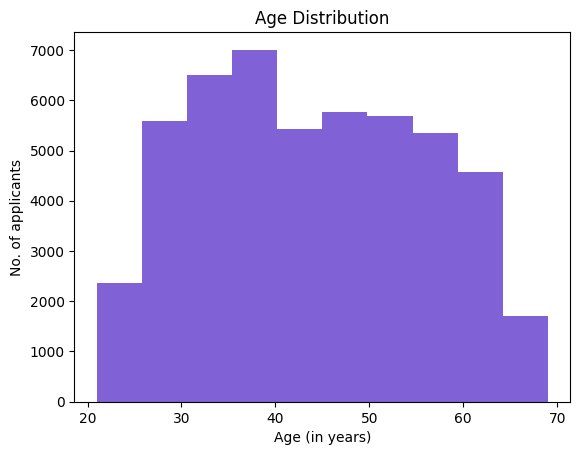

In [ ]:
fig, ax = plt.subplots()
ax.hist(data["AGE"],
        color="#8062D6");
ax.set(title="Age Distribution",
       ylabel="No. of applicants",
       xlabel="Age (in years)");

Notice that most of the applicants are in the age group of mid 20s to mid 60s. Not so surprisingly, this is also the working age of a normal population when they are in need of loans to build a house, finance their children's higher education, or plan for retirement.

In [ ]:
pd.crosstab(data["AGE"], data["TARGET"])

TARGET   0.0  1.0
AGE              
21.0     109    6
22.0     297   45
23.0     537   76
24.0     562   70
25.0     577   87
26.0     652   59
27.0     871  113
28.0    1220  158
29.0    1094  131
30.0    1144  156
31.0    1192  142
32.0    1276  133
33.0    1142  132
34.0    1120  129
35.0    1128  108
36.0    1149  129
37.0    1291  143
38.0    1333  134
39.0    1313  128
40.0    1281  106
41.0    1277  120
42.0    1288   97
43.0    1218   89
44.0    1234  110
45.0    1085   90
46.0    1108   97
47.0    1094   84
48.0    1039   82
49.0    1012   77
50.0    1050   80
51.0     931   86
52.0    1078   60
53.0    1116   78
54.0    1141   75
55.0    1086   60
56.0    1003   66
57.0    1034   67
58.0     973   49
59.0     951   58
60.0    1007   50
61.0     879   52
62.0     838   48
63.0     847   49
64.0     754   44
65.0     647   28
66.0     414   16
67.0     302   16
68.0     234   11
69.0      45    2

In [ ]:
age_groups = pd.cut(data["AGE"], bins=[20, 30, 40, 50, 60, 70])
age_groups

0        (20, 30]
1        (40, 50]
2        (50, 60]
3        (50, 60]
4        (50, 60]
5        (40, 50]
6        (30, 40]
7        (50, 60]
8        (50, 60]
9        (30, 40]
10       (20, 30]
11       (50, 60]
12       (30, 40]
13       (30, 40]
14       (30, 40]
15       (20, 30]
16       (30, 40]
17       (20, 30]
18       (40, 50]
19       (30, 40]
20       (40, 50]
21       (40, 50]
22       (30, 40]
23       (60, 70]
24       (30, 40]
25       (50, 60]
26       (50, 60]
27       (40, 50]
28       (20, 30]
29       (20, 30]
30       (40, 50]
31       (30, 40]
32       (30, 40]
33       (30, 40]
34       (40, 50]
35       (30, 40]
36       (40, 50]
37       (50, 60]
38       (60, 70]
39       (40, 50]
40       (40, 50]
41       (40, 50]
42       (30, 40]
43       (60, 70]
44       (20, 30]
45       (20, 30]
46       (50, 60]
47       (50, 60]
48       (50, 60]
49       (40, 50]
50       (30, 40]
51       (50, 60]
52       (30, 40]
53       (20, 30]
54       (50, 60]
55       (

In [ ]:
data.groupby(age_groups)["TARGET"].value_counts(normalize=True)

AGE       TARGET
(20, 30]  0.0       0.886866
          1.0       0.113134
(30, 40]  0.0       0.904952
          1.0       0.095048
(40, 50]  0.0       0.924905
          1.0       0.075095
(50, 60]  0.0       0.940833
          1.0       0.059167
(60, 70]  0.0       0.949101
          1.0       0.050899
Name: TARGET, dtype: float64

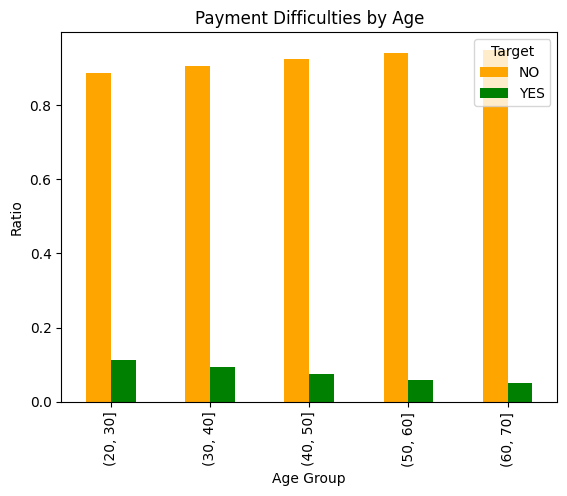

In [ ]:
pd.crosstab(age_groups,
            data["TARGET"],
            normalize='index').plot(kind="bar",
                                    xlabel="Age Group",
                                    ylabel="Ratio",
                                    title="Payment Difficulties by Age",
                                    color=["orange", "green"])
plt.legend(labels=["NO", "YES"], title="Target");

Observe that the ratio of delayed payments, although not significantly, keeps reducing with age.

With age people get more settled in life and have a stable income to support their families. Younger people tend to not have financial literacy which could be the cause of unnecessary spending and in turn, leading to loan defaults.

Last but certainly not the least, it is very important to observe how pre-established `REGION_RATING_CLIENT` affects an application leading to loan defaults.

In [ ]:
data["REGION_RATING_CLIENT"].value_counts()

2.0    36964
3.0     7809
1.0     5226
Name: REGION_RATING_CLIENT, dtype: int64

Via a grouped bar chart, let's look at the distribution of data in the `REGION_RATING_CLIENT`.

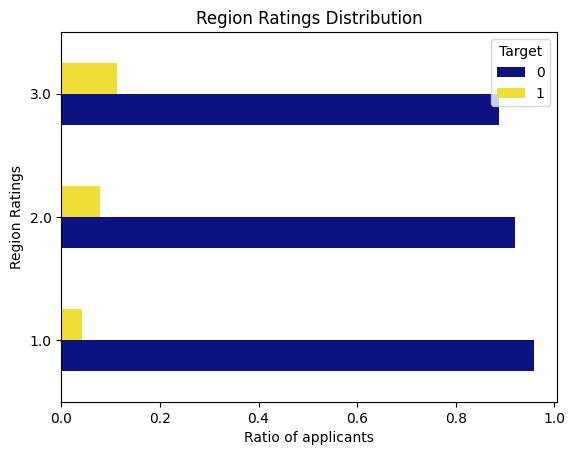

In [ ]:
pd.crosstab(data["REGION_RATING_CLIENT"],
            data["TARGET"],
            normalize='index').plot(kind="barh",
                                    xlabel="Ratio of applicants",
                                    ylabel="Region Ratings",
                                    title="Region Ratings Distribution",
                                    color=["#0D1282", "#F0DE36"])
plt.legend(labels=["0", "1"], title="Target");

The ratings are in fact **inconsistent** and seem **inaccurate** since a region with a low rating (1.0) has lower cases of loan defaults while that with a high rating (3.0) has the highest cases.

We see a direct relation between region rating and proportion of loan defaults although an opposite relation was expected.


---

---





From the univariate and bivariate analysis, we draw the following conclusions & insights:
- Males are more likely to make a delayed payment compared to females.
- Higher education directly implies a lower chance of having payment difficulties.
- Higher education, more often than not, guarantees a higher annual salary.
- As family members and children keep increasing, the chances of a late payment are higher.
- Loans are common the age group of 25 - 65.
- Younger people tend to find it difficult to repay their loan.
- A client's region ratings are inaccurate and shouldn't be taken into account.

## Identify Top Correlations for Different Scenarios

We shall plot a Seaborn heatmap to visualize the correlations between the different variables and the `TARGET` variable.

<ipython-input-65-d26bcfb92d71>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(data.corr(),


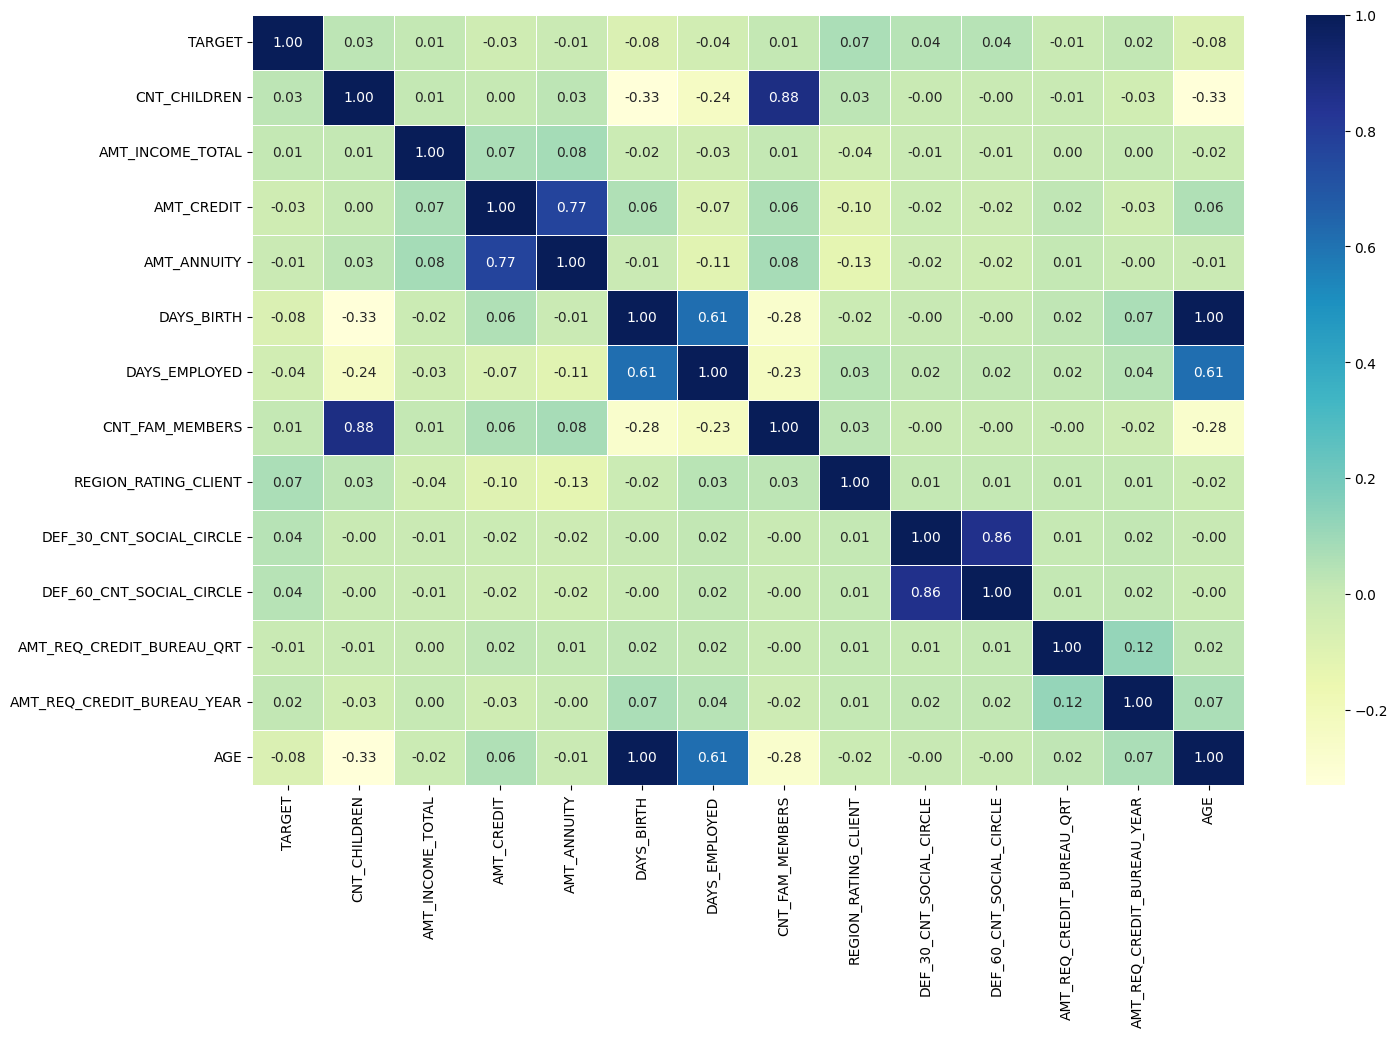

In [ ]:
fig, ax = plt.subplots(figsize=(16, 10))
ax = sns.heatmap(data.corr(),
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

Overall, there aren't many variables that possess a strong positive or negative correlation with the `TARGET` variable.

But as stated before, `AGE` and `DAYS_EMPLOYED` are inversely proportional to the late payments (`TARGET`), while `CNT_CHILDREN` and `REGION_RATING_CLIENT` are directly proportional (to having loan defaults).